<a href="https://colab.research.google.com/github/APARNAGADHIYA/Fall-Activity-Recognition_UP-Fall/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/Fall_Detection_Using_Human_Skeleton_Features/CSVFiles/Dataset_for_SVM.csv')

In [3]:
dataset

,Nose_X,Nose_Y,LEye_X,LEye_Y,REye_X,REye_Y,LEar_X,LEar_Y,REar_X,REar_Y,LShoulder_X,LShoulder_Y,RShoulder_X,RShoulder_Y,LElbow_X,LElbow_Y,RElbow_X,RElbow_Y,LWrist_X,LWrist_Y,RWrist_X,RWrist_Y,LHip_X,LHip_Y,RHip_X,RHip_Y,LKnee_X,LKnee_Y,Rknee_X,Rknee_Y,LAnkle_X,LAnkle_Y,RAnkle_X,RAnkle_Y,Score,Activity,Class
0,418.167908,212.008392,423.865478,206.310822,418.167908,206.310822,446.655792,206.310822,443.807007,206.310822,469.446137,243.345093,432.411865,237.647507,463.748535,308.867248,421.016693,286.076935,423.865478,343.052734,406.772736,328.808807,463.748535,354.447906,435.260651,348.750336,463.748535,419.970093,443.807007,414.272492,466.597351,471.248291,446.655792,462.701935,3.071887,1,0
1,419.789581,214.127029,425.524383,205.524811,416.922180,205.524811,445.596191,205.524811,442.728790,205.524811,471.402832,245.668442,434.126587,237.066238,465.668030,305.883881,422.656982,285.812073,442.728790,357.497131,411.187378,325.955688,465.668030,351.762329,434.126587,346.027527,462.800629,420.579987,442.728790,414.845154,465.668030,472.193207,448.463593,463.591003,3.090761,1,0
2,417.496674,212.123474,423.200043,206.420120,417.496674,206.420120,446.013458,206.420120,440.310089,206.420120,471.678528,246.343582,434.606750,237.788559,465.975189,306.228790,423.200043,283.415375,454.568481,363.262329,414.645019,323.338837,465.975189,351.855621,434.606750,346.152252,463.123505,420.295837,443.161774,414.592499,465.975189,471.626007,448.865112,463.070984,3.083132,1,0
3,416.467835,211.306610,422.378326,205.396088,416.467835,205.396088,446.020416,205.396088,440.109894,205.396088,469.662506,246.769730,434.199371,237.903946,472.617767,308.830170,434.199371,288.143372,469.662506,362.024841,419.423065,320.651215,460.796722,353.159088,434.199371,347.248566,463.751984,424.085297,443.065155,412.264282,466.707245,471.369446,448.975678,462.503693,3.042056,1,0
4,417.535492,210.987717,420.436218,205.186279,414.634766,205.186279,443.641998,208.086990,440.741272,208.086990,469.748505,245.796387,434.939819,237.094223,481.351379,306.711548,437.840546,289.307221,481.351379,361.825287,423.336945,324.115906,458.145599,353.123108,432.039124,347.321686,463.947052,422.740448,443.641998,414.038300,466.847778,472.052734,446.542725,463.350586,3.021970,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16875,236.192459,165.997909,235.464157,164.541305,236.192459,163.813003,222.354736,166.726212,235.464157,165.997909,216.528320,183.477142,241.290558,183.477142,213.615112,202.412979,244.932068,205.326172,218.713226,211.880890,240.562256,216.979004,223.083023,223.533707,238.377365,222.805405,225.632080,239.920487,240.198120,239.920487,224.175476,239.920487,238.741516,239.920487,1.761851,9,5
16876,175.626114,197.964188,178.481979,189.396591,167.058517,192.252457,181.337845,192.252457,155.635055,197.964188,198.473038,229.378723,141.355713,235.090454,209.896500,272.216705,135.643982,283.640167,201.328903,306.487091,164.202652,312.198822,195.617172,317.910553,161.346787,317.910553,198.473038,380.739624,164.202652,383.595489,204.184769,435.001068,167.058517,437.856934,3.103301,9,5
16877,236.625092,166.702301,234.447464,165.250549,235.899216,164.524674,222.107544,166.702301,235.173340,165.976425,217.026413,183.397476,240.980362,183.397476,214.122894,202.996155,245.335617,205.899674,221.381668,212.432571,240.980362,216.787827,222.833420,222.594849,238.802719,222.594849,224.648117,239.652954,240.617416,239.652954,224.648117,239.652954,239.165665,239.652954,1.731628,9,5
16878,176.308823,197.406448,179.172104,191.679886,167.718964,191.679886,182.035385,194.543167,153.402557,197.406448,199.215088,231.765854,139.086136,234.629135,210.668228,271.851837,133.359558,280.441681,202.078369,306.211243,161.992401,311.937805,196.351807,317.664368,161.992401,320.527649,199.215088,380.656616,164.855682,383.519898,204.941666,435.058991,164.855682,437.922272,3.112766,9,5


In [4]:
dataset.shape

(16880, 37)

In [5]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[683   8   1   0   0   0]
 [ 15 429   2   0   0   0]
 [  0   4 479   7   9   0]
 [  2   0   3 520   4   0]
 [  0   1   4   4 499   0]
 [  0   0   0   0   0 702]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       692
           1       0.97      0.96      0.97       446
           2       0.98      0.96      0.97       499
           3       0.98      0.98      0.98       529
           4       0.97      0.98      0.98       508
           5       1.00      1.00      1.00       702

    accuracy                           0.98      3376
   macro avg       0.98      0.98      0.98      3376
weighted avg       0.98      0.98      0.98      3376



[[0.97571429 0.01809955 0.00204499 0.         0.         0.        ]
 [0.02142857 0.97058824 0.00408998 0.         0.         0.        ]
 [0.         0.00904977 0.9795501  0.01318267 0.01757812 0.        ]
 [0.00285714 0.         0.00613497 0.97928437 0.0078125  0.        ]
 [0.         0.00226244 0.00817996 0.00753296 0.97460938 0.        ]
 [0.         0.         0.         0.         0.         1.        ]]


Text(0.5, 0, 'Predicted label')

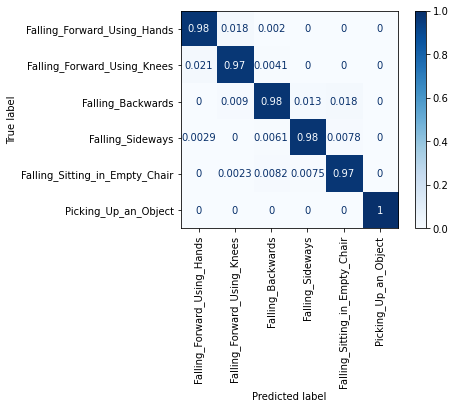

In [11]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
class_names=['Falling_Forward_Using_Hands','Falling_Forward_Using_Knees','Falling_Backwards','Falling_Sideways','Falling_Sitting_in_Empty_Chair','Picking_Up_an_Object']
display_cm = plot_confusion_matrix(classifier, X_test, y_test,display_labels=class_names, cmap=plt.cm.Blues, normalize='pred',xticks_rotation='vertical')
print(display_cm.confusion_matrix)
#figure = plt.figure(figsize=(6,6))
#plt.tight_layout(pad=1.5,h_pad=None,w_pad=None,rect=None)
plt.ylabel('True label')
plt.xlabel('Predicted label')